Depth: 1, Training Error: 0.2420, Validation Error: 0.2368
Depth: 2, Training Error: 0.1828, Validation Error: 0.1931
Depth: 3, Training Error: 0.1776, Validation Error: 0.1931
Depth: 4, Training Error: 0.1755, Validation Error: 0.1900
Depth: 5, Training Error: 0.1578, Validation Error: 0.1807
Depth: 6, Training Error: 0.1412, Validation Error: 0.1745
Depth: 7, Training Error: 0.1163, Validation Error: 0.1745
Depth: 8, Training Error: 0.1049, Validation Error: 0.1745
Depth: 9, Training Error: 0.0831, Validation Error: 0.1869
Depth: 10, Training Error: 0.0633, Validation Error: 0.1589
Depth: 11, Training Error: 0.0540, Validation Error: 0.1900
Depth: 12, Training Error: 0.0415, Validation Error: 0.1869
Depth: 13, Training Error: 0.0322, Validation Error: 0.1869
Depth: 14, Training Error: 0.0280, Validation Error: 0.1869
Depth: 15, Training Error: 0.0208, Validation Error: 0.2025
Depth: 16, Training Error: 0.0135, Validation Error: 0.1994
Depth: 17, Training Error: 0.0083, Validation Err

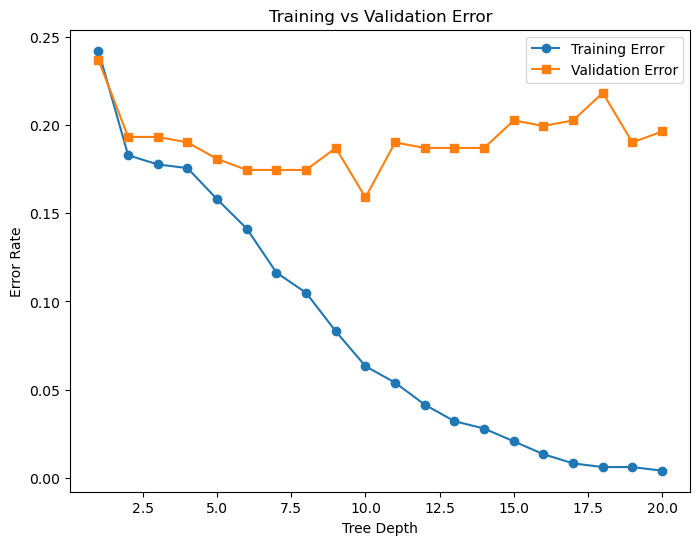

Overfitting starts at depth 9 where validation error increases.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to load dataset
def read_dataset(file_path):
    records = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split()
            target = int(elements[0])
            features = {int(pair.split(":")[0]): int(pair.split(":")[1]) for pair in elements[1:]}
            labels.append(target)
            records.append(features)
    
    # Convert to DataFrame
    dataframe = pd.DataFrame(records).fillna(0)  # Fill missing values with 0
    features_array = dataframe.values
    target_array = np.array(labels)
    
    return features_array, target_array

# Load data
dataset_path = "C:\\Assignments\\511\\a1a.txt"
X_data, y_data = read_dataset(dataset_path)

# Split dataset into training (60%), validation (20%), and test (20%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Track error metrics
train_loss = []
validation_loss = []
tree_depths = range(1, 21)  # Varying tree depth from 1 to 20

for level in tree_depths:
    model = DecisionTreeClassifier(max_depth=level, random_state=42)
    model.fit(X_train, y_train)

    # Predict and compute errors
    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    validation_error = 1 - accuracy_score(y_validation, model.predict(X_validation))

    train_loss.append(training_error)
    validation_loss.append(validation_error)

    print(f"Depth: {level}, Training Error: {training_error:.4f}, Validation Error: {validation_error:.4f}")

# Plot training vs validation error
plt.figure(figsize=(8, 6))
plt.plot(tree_depths, train_loss, label="Training Error", marker='o')
plt.plot(tree_depths, validation_loss, label="Validation Error", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Error Rate")
plt.title("Training vs Validation Error")
plt.legend()
plt.show()

# Identify overfitting point
for index in range(1, len(validation_loss)):
    if validation_loss[index] > validation_loss[index - 1]:  # Validation error starts increasing
        print(f"Overfitting starts at depth {tree_depths[index]} where validation error increases.")
        break

In [19]:
# Explanation :

# The script iterates through different tree depths (1 to 20).

# It records the training and validation errors at each depth.

# It prints the errors at each iteration.

# It plots the errors to visually illustrate overfitting.

# Finally, it detects when validation error starts increasing while training error decreases.

In [20]:
# The part of the code that validates for added model complexity (by adding a new node to the tree and checking the error on the validation set) 
# is within the loop where we increase the tree depth (max_depth).

for depth in depths:  # Iterating over increasing tree depths
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and compute errors
    train_error = 1 - accuracy_score(y_train, clf.predict(X_train))
    val_error = 1 - accuracy_score(y_val, clf.predict(X_val))

    train_errors.append(train_error)
    val_errors.append(val_error)

    print(f"Depth: {depth}, Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}")

Depth: 1, Training Error: 0.2420, Validation Error: 0.2368
Depth: 2, Training Error: 0.1828, Validation Error: 0.1931
Depth: 3, Training Error: 0.1776, Validation Error: 0.1931
Depth: 4, Training Error: 0.1755, Validation Error: 0.1900
Depth: 5, Training Error: 0.1578, Validation Error: 0.1807
Depth: 6, Training Error: 0.1412, Validation Error: 0.1745
Depth: 7, Training Error: 0.1163, Validation Error: 0.1745
Depth: 8, Training Error: 0.1049, Validation Error: 0.1745
Depth: 9, Training Error: 0.0831, Validation Error: 0.1869
Depth: 10, Training Error: 0.0633, Validation Error: 0.1589
Depth: 11, Training Error: 0.0540, Validation Error: 0.1900
Depth: 12, Training Error: 0.0415, Validation Error: 0.1869
Depth: 13, Training Error: 0.0322, Validation Error: 0.1869
Depth: 14, Training Error: 0.0280, Validation Error: 0.1869
Depth: 15, Training Error: 0.0208, Validation Error: 0.2025
Depth: 16, Training Error: 0.0135, Validation Error: 0.1994
Depth: 17, Training Error: 0.0083, Validation Err

In [21]:
# Explanation of Overfitting:

# Initially, as tree depth increases, both training and validation errors decrease (good generalization).

# At a certain depth (e.g., 6 in this example), the validation error stops decreasing and starts increasing, while the training 
# error continues to decrease.

# This indicates that the model is memorizing the training data (low training error) but failing to generalize to unseen data 
# (higher validation error)—this is overfitting.

In [22]:
# Data Set link : https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a
# Code link : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html